In [1]:
import torch
from torch import optim
from tqdm import tqdm

import numpy as np
import copy
import json

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
USE_CUDA = True
use_device = torch.device('cuda' if USE_CUDA else 'cpu')

In [2]:
from data_util import Schema

root = '/notebooks/sinica/dataset/'

schema_root = root+'schema_mr5.txt'
relation_data = root+'skincare_mr5.train'
dev_data = root+'skincare_mr5.dev'
test_data = root+'skincare_mr5.test'

word_to_ix = '/notebooks/sinica/code/word_to_ix.pkl'


schema = Schema(schema_root)
# schema.rel2ix
# {'ApplyIn': 4,'ApplyTo': 2, 'ApprovedOf': 6, 'Feel': 3, 'Rel-None': 1, 'Rel-Pad': 0, 'Relieve': 5}

In [3]:
# ========hyper-parameter-set==========
MAX_LEN = 100
BATCH_SIZE = 32

EMBEDDING_DIM = 64
HIDDEN_DIM1 = 30  #30
HIDDEN_DIM2 =  16 #16
LABEL_EMBED_DIM = 8 #8

ATTN_OUT = 8 #8

n_iter = 45
rel_be_filtered=None
# rel_be_filtered=['Relieve']

In [4]:
from data_util import BIOLoader

loader = BIOLoader(relation_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                   word_to_ix=word_to_ix, shuffle=True, device=use_device)
dev_loader = BIOLoader(dev_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                       word_to_ix=loader.word_to_ix, device=use_device)

In [5]:
from models_v1_5 import JointERE


param_list = [loader.vocab_size, EMBEDDING_DIM, HIDDEN_DIM1, HIDDEN_DIM2, LABEL_EMBED_DIM,
             ATTN_OUT, schema]


model = JointERE(*param_list).to(use_device)
model.fit(loader, dev_loader, n_iter=n_iter)


  2%|▏         | 1/45 [00:26<19:05, 26.03s/it]

epoch: 1 | ent loss 0.7263 | rel loss 0.8299 | total loss 1.5562
         | val ent loss 0.5894 | val rel loss 0.2068


  4%|▍         | 2/45 [00:52<18:43, 26.14s/it]

epoch: 2 | ent loss 0.4306 | rel loss 0.4164 | total loss 0.8470
         | val ent loss 0.4224 | val rel loss 0.1174


  7%|▋         | 3/45 [01:18<18:19, 26.18s/it]

epoch: 3 | ent loss 0.2385 | rel loss 0.3022 | total loss 0.5408
         | val ent loss 0.1723 | val rel loss 0.0885


  9%|▉         | 4/45 [01:44<17:48, 26.07s/it]

epoch: 4 | ent loss 0.2576 | rel loss 0.3705 | total loss 0.6281
         | val ent loss 0.0997 | val rel loss 0.0688


 11%|█         | 5/45 [02:10<17:25, 26.13s/it]

epoch: 5 | ent loss 0.0954 | rel loss 0.2276 | total loss 0.3230
         | val ent loss 0.0943 | val rel loss 0.1173


 13%|█▎        | 6/45 [02:38<17:07, 26.35s/it]

epoch: 6 | ent loss 0.1225 | rel loss 0.1962 | total loss 0.3188
         | val ent loss 0.1439 | val rel loss 0.0488


 16%|█▌        | 7/45 [03:04<16:41, 26.36s/it]

epoch: 7 | ent loss 0.0964 | rel loss 0.1254 | total loss 0.2218
         | val ent loss 0.0763 | val rel loss 0.0734


 18%|█▊        | 8/45 [03:29<16:10, 26.24s/it]

epoch: 8 | ent loss 0.0581 | rel loss 0.1406 | total loss 0.1987
         | val ent loss 0.1213 | val rel loss 0.0425


 20%|██        | 9/45 [03:55<15:40, 26.12s/it]

epoch: 9 | ent loss 0.0831 | rel loss 0.1721 | total loss 0.2552
         | val ent loss 0.0821 | val rel loss 0.0718


 22%|██▏       | 10/45 [04:20<15:10, 26.03s/it]

epoch: 10 | ent loss 0.0612 | rel loss 0.1289 | total loss 0.1901
          | val ent loss 0.0685 | val rel loss 0.0753


 24%|██▍       | 11/45 [04:45<14:42, 25.97s/it]

epoch: 11 | ent loss 0.0507 | rel loss 0.1304 | total loss 0.1811
          | val ent loss 0.0540 | val rel loss 0.0531


 27%|██▋       | 12/45 [05:09<14:11, 25.82s/it]

epoch: 12 | ent loss 0.0737 | rel loss 0.1507 | total loss 0.2244
          | val ent loss 0.0480 | val rel loss 0.0445


 29%|██▉       | 13/45 [05:33<13:41, 25.66s/it]

epoch: 13 | ent loss 0.0359 | rel loss 0.1342 | total loss 0.1701
          | val ent loss 0.0691 | val rel loss 0.0509


 31%|███       | 14/45 [05:56<13:10, 25.49s/it]

epoch: 14 | ent loss 0.0468 | rel loss 0.0970 | total loss 0.1438
          | val ent loss 0.0684 | val rel loss 0.0621


 33%|███▎      | 15/45 [06:19<12:39, 25.33s/it]

epoch: 15 | ent loss 0.0601 | rel loss 0.0933 | total loss 0.1534
          | val ent loss 0.0609 | val rel loss 0.0514


 36%|███▌      | 16/45 [06:42<12:10, 25.18s/it]

epoch: 16 | ent loss 0.0741 | rel loss 0.0804 | total loss 0.1545
          | val ent loss 0.0443 | val rel loss 0.0145


 38%|███▊      | 17/45 [07:06<11:41, 25.07s/it]

epoch: 17 | ent loss 0.0862 | rel loss 0.0923 | total loss 0.1785
          | val ent loss 0.0696 | val rel loss 0.0826


 40%|████      | 18/45 [07:30<11:16, 25.05s/it]

epoch: 18 | ent loss 0.0587 | rel loss 0.1470 | total loss 0.2057
          | val ent loss 0.0685 | val rel loss 0.0705


 42%|████▏     | 19/45 [07:56<10:52, 25.08s/it]

epoch: 19 | ent loss 0.0393 | rel loss 0.0680 | total loss 0.1074
          | val ent loss 0.0846 | val rel loss 0.0684


 44%|████▍     | 20/45 [08:22<10:28, 25.14s/it]

epoch: 20 | ent loss 0.0456 | rel loss 0.0585 | total loss 0.1041
          | val ent loss 0.0793 | val rel loss 0.0585


 47%|████▋     | 21/45 [08:48<10:04, 25.17s/it]

epoch: 21 | ent loss 0.0299 | rel loss 0.1041 | total loss 0.1340
          | val ent loss 0.0700 | val rel loss 0.0571


 49%|████▉     | 22/45 [09:15<09:40, 25.25s/it]

epoch: 22 | ent loss 0.0413 | rel loss 0.0594 | total loss 0.1007
          | val ent loss 0.0509 | val rel loss 0.0565


 51%|█████     | 23/45 [09:42<09:17, 25.34s/it]

epoch: 23 | ent loss 0.0262 | rel loss 0.0962 | total loss 0.1224
          | val ent loss 0.0254 | val rel loss 0.0081


 53%|█████▎    | 24/45 [10:10<08:54, 25.43s/it]

epoch: 24 | ent loss 0.0427 | rel loss 0.0383 | total loss 0.0810
          | val ent loss 0.0361 | val rel loss 0.0074


 56%|█████▌    | 25/45 [10:36<08:28, 25.44s/it]

epoch: 25 | ent loss 0.0472 | rel loss 0.1412 | total loss 0.1883
          | val ent loss 0.0455 | val rel loss 0.0237


 58%|█████▊    | 26/45 [11:01<08:03, 25.44s/it]

epoch: 26 | ent loss 0.0434 | rel loss 0.0540 | total loss 0.0974
          | val ent loss 0.0852 | val rel loss 0.0947


 60%|██████    | 27/45 [11:26<07:37, 25.44s/it]

epoch: 27 | ent loss 0.0438 | rel loss 0.0778 | total loss 0.1216
          | val ent loss 0.0432 | val rel loss 0.0281


 62%|██████▏   | 28/45 [11:52<07:12, 25.43s/it]

epoch: 28 | ent loss 0.0492 | rel loss 0.0517 | total loss 0.1008
          | val ent loss 0.0772 | val rel loss 0.0891


 64%|██████▍   | 29/45 [12:17<06:46, 25.43s/it]

epoch: 29 | ent loss 0.0373 | rel loss 0.0935 | total loss 0.1307
          | val ent loss 0.0560 | val rel loss 0.0996


 67%|██████▋   | 30/45 [12:43<06:21, 25.46s/it]

epoch: 30 | ent loss 0.0338 | rel loss 0.0607 | total loss 0.0945
          | val ent loss 0.0842 | val rel loss 0.0555


 69%|██████▉   | 31/45 [13:12<05:57, 25.56s/it]

epoch: 31 | ent loss 0.0239 | rel loss 0.0420 | total loss 0.0658
          | val ent loss 0.0835 | val rel loss 0.0677


 71%|███████   | 32/45 [13:38<05:32, 25.57s/it]

epoch: 32 | ent loss 0.0537 | rel loss 0.0597 | total loss 0.1134
          | val ent loss 0.1054 | val rel loss 0.1102


 73%|███████▎  | 33/45 [14:04<05:07, 25.60s/it]

epoch: 33 | ent loss 0.0474 | rel loss 0.0868 | total loss 0.1343
          | val ent loss 0.0382 | val rel loss 0.0064


 76%|███████▌  | 34/45 [14:30<04:41, 25.61s/it]

epoch: 34 | ent loss 0.0566 | rel loss 0.1013 | total loss 0.1579
          | val ent loss 0.0402 | val rel loss 0.0595


 78%|███████▊  | 35/45 [14:57<04:16, 25.66s/it]

epoch: 35 | ent loss 0.0275 | rel loss 0.0415 | total loss 0.0690
          | val ent loss 0.0338 | val rel loss 0.0487


 80%|████████  | 36/45 [15:25<03:51, 25.70s/it]

epoch: 36 | ent loss 0.0394 | rel loss 0.0490 | total loss 0.0884
          | val ent loss 0.1110 | val rel loss 0.1744


 82%|████████▏ | 37/45 [15:51<03:25, 25.72s/it]

epoch: 37 | ent loss 0.1038 | rel loss 0.0687 | total loss 0.1725
          | val ent loss 0.0200 | val rel loss 0.0032


 84%|████████▍ | 38/45 [16:18<03:00, 25.75s/it]

epoch: 38 | ent loss 0.0416 | rel loss 0.0610 | total loss 0.1026
          | val ent loss 0.0461 | val rel loss 0.0342


 87%|████████▋ | 39/45 [16:46<02:34, 25.80s/it]

epoch: 39 | ent loss 0.0550 | rel loss 0.0708 | total loss 0.1258
          | val ent loss 0.0197 | val rel loss 0.0024


 89%|████████▉ | 40/45 [17:14<02:09, 25.86s/it]

epoch: 40 | ent loss 0.0383 | rel loss 0.0646 | total loss 0.1029
          | val ent loss 0.0340 | val rel loss 0.0429


 91%|█████████ | 41/45 [17:42<01:43, 25.91s/it]

epoch: 41 | ent loss 0.0490 | rel loss 0.0413 | total loss 0.0902
          | val ent loss 0.0679 | val rel loss 0.0305


 93%|█████████▎| 42/45 [18:09<01:17, 25.93s/it]

epoch: 42 | ent loss 0.0611 | rel loss 0.1069 | total loss 0.1679
          | val ent loss 0.0155 | val rel loss 0.0071


 96%|█████████▌| 43/45 [18:36<00:51, 25.97s/it]

epoch: 43 | ent loss 0.0254 | rel loss 0.0914 | total loss 0.1168
          | val ent loss 0.0416 | val rel loss 0.0274


 98%|█████████▊| 44/45 [19:04<00:26, 26.00s/it]

epoch: 44 | ent loss 0.0303 | rel loss 0.0514 | total loss 0.0817
          | val ent loss 0.0267 | val rel loss 0.0044


100%|██████████| 45/45 [19:31<00:00, 26.03s/it]

epoch: 45 | ent loss 0.0611 | rel loss 0.1111 | total loss 0.1721
          | val ent loss 0.0454 | val rel loss 0.0565


JointERE(
  (bn): BatchNorm1d(30, eps=1e-05, momentum=0.5, affine=False, track_running_stats=True)
  (word_embeds): Embedding(1852, 64)
  (bilstm): GRU(64, 15, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (top_hidden): LSTMCell(38, 16)
  (hidden2tag): Linear(in_features=16, out_features=17, bias=True)
  (softmax): LogSoftmax()
  (label_embed): Linear(in_features=17, out_features=8, bias=False)
  (attn): Attn(
    (w1): Linear(in_features=24, out_features=8, bias=False)
    (w2): Linear(in_features=24, out_features=8, bias=False)
    (tanh): Tanh()
    (v): Linear(in_features=8, out_features=7, bias=False)
    (softmax): LogSoftmax()
  )
)

In [6]:
torch.save(model.state_dict(), 'relation_extraction_1_new.pth')
# model.load_state_dict(torch.load('relation_extraction_1_new.pth'))

In [7]:
# model.fit(loader, dev_loader, n_iter=10)

['因', '為', '有', '加', '保', '濕', '精', '華', '的', '成', '分', ',', '所', '以', '能', '維', '持', '比', '較', '長', '時', '間', '的', '不', '脫', '妝', ',', '我', '早', '上', '上', '完', '粉', '餅', '後', ',', '大', '概', '到', '下', '午', '3', '點', '左', '右', '最', '容', '易', '出', '油', ',', '但', '這', '款', '反', '而', '比', '較', '不', '容', '易', '出', '油', ',', '還', '有', '保', '溼', '的', '感', '覺', '真', '的', '很', '棒']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '',

['使', '用', '此', '款', '美', '髮', '油', '之', '後', ',', '頭', '髮', '觸', '感', '摸', '起', '來', '很', '保', '濕']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(2, 3, 3), (12, 13, 4), (18, 19, 5)]
[((2, 3, 3), (18, 19, 5), 3)]
predict
[(2, 3, 3), (12, 13, 4), (18, 19, 5)]
[((2, 3, 3), (18, 19, 5), 3)]
['保', '濕', '商', '品', '一', '向', '是', '我', '最', '最', '注', '重', '的', '臉', '部', '保', '養', '商', '品', '之', '一', ',', '因', '為', '屬', '於', '極', '敏', '感', '性', '且', '偏', '乾', '的', '膚', '質', 

['此', '款', '珂', '潤', '美', '白', '精', '華', '質', '地', '相', '當', '細', '緻', '好', '推', '勻', '.', '延', '展', '性', '很', '好']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', ['Feel-0-A', 'Feel-1-A'], ['Feel-0-A', 'Feel-1-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-1-B'], ['Feel-1-B'], ['Feel-1-B'], '', '', '', '', '', '']

True
[(0, 1, 3), (8, 9, 4), (12, 13, 6), (14, 16, 6)]
[((8, 9, 4), (12, 13, 6), 2), ((8, 9, 4), (14, 16, 6), 2)]
predict
[(0, 1, 3), (8, 9, 4), (12, 13, 6), (14, 16, 6)]
[

['屬', '於', '水', '狀', '液', '體', ',', '有', '種', '香', '香', '的', '氣', '味', ',', '很', '好', '聞', '不', '會', '剌', '鼻', '濃']
['O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-PERC']
['', '', [], [], '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', []]

Predict output
['O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-PERC']
['', '', [], [], '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', []]

True
[(2, 3, 6), (12, 13, 4), (16, 17, 6), (22, 22, 6)]
[((12, 13, 4), (16, 17, 6), 2)]
predict
[(2, 3, 6), (12, 13, 4), (16, 17, 6), (22, 22, 6)]
[((12, 13, 4), (16, 17, 6), 2)]
['他', '不', '像', '一', '般', '化', '妝', '水', '是', '稀', '稀', '的', '水', '狀', ',', '而', '是', '比', '較', '濃', '稠', '的', '水', '狀',

['待', '在', '冷', '氣', '房', '的', 'O', 'L', '都', '知', '道', '即', '使', '夏', '天', '油', '水', '更', '不', '平', '衡', '所', '以', '臉', '部', '的', '乾', '感', '會', '更', '明', '顯', ',', '油', '感', '也', '會', '更', '凸', '顯', ',', '用', '了', '這', 'S', 'U', 'R', 'P', 'U', 'R', '後', '混', '和', '肌', '的', 'T', '字', '油', '感', '與', '雙', '頰', '乾', '感', '舒', '緩', '很', '多', ',', '滿', '威', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['整', '體', '來', '說', ',', '這', '款', '卸', '妝', '水', '我', '滿', '喜', '歡', '的', ',', '卸', '妝', '效', '果', '不', '錯', ',', '沒', '有', '人', '工', '香', '精', ',', '邊', '卸', '妝', '還', '兼', '保', '濕', ',', '不', '過', ',', '控', '油', '方', '面', '對', '於', '我', '這', '個', '大', '油', '臉', '是', '沒', '什', '麼', '效', '果', '啦']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

['建', '議', '使', '用', '的', '用', '量', '是', '0', '.', '5', 'm', 'l', '約', '1', '元', '硬', '幣', '大', '小', ',', '大', '約', '是', '按', '壓', '2', '次', '的', '份', '量', ',', '這', '款', '保', '濕', '原', '液', '的', '質', '地', '是', '比', '較', '接', '近', '會', '流', '動', '的', '水', '溶', '液', '式', '透', '明', '凝', '露', '狀', ',', '原', '本', '預', '期', '高', '達', '1', '%', '的', '玻', '尿', '酸', '原', '液', '應', '該', '會', '更', '黏', '稠', '一', '些', ',', '但', '其', '實', '反', '而', '是', '比', '較', '清', '爽', '的', '質', '地']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC'

['4', '.', '礦', '物', '成', '分', '為', '主', ',', '我', '的', '臉', '本', '來', '擦', '一', '些', '韓', '系', 'B', 'B', '霜', '粉', '容', '易', '過', '敏', '或', '是', '長', '粉', '刺', ',', '但', '是', '擦', '這', '款', '完', '全', '不', '會', ',', '也', '不', '會', '亂', '長', '東', '西']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['這', '款', 'L', 'A', 'N', 'E', 'I', 'G', 'E', '蘭', '芝', ',', '水', '酷', '肌', '因', '保', '濕', '精', '華', '對', '極', '乾', '肌', '膚', '的', '我', '不', '夠', '滋', '潤', ',', '所', '以', '我', '不', '會', '回', '購', ',', '但', '推', '薦', '給', '油', '性', '肌', '膚', '的', '朋', '友', '們', '可', '以', '試', '試', '看']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT

['D', 'R', '.', 'W', 'U', '玻', '尿', '酸', '保', '濕', '精', '華', '霜', '絕', '對', '是', '乾', '妹', '妹', '冬', '天', '一', '定', '要', '入', '手', '的', '好', '貨', '喔', '~', '~']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '']

True
[(19, 20, 2)]
[]
predict
[(19, 20, 2)]
[]
['這', '瓶', '活', '力', '緊', '緻', '1', '5', '奇', '蹟', '霜', 'S', 'P', 'F', '1', '8', '屬', '於', '日', '霜']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['這', '種', '保', '濕', '凝', '霜', '是', '非', '常', '普', '遍', '的', '此', '款', '保', '濕', '持', '久', '度', '還', '不', '錯', '不', '過', '沒', '有', '像', '產', '品', '功', '能', '有', '提', '升', '肌', '膚', '的', '彈', '性', '而', '且', '在', '塗', '抹', '一', '個', '小', '時', '後', ',', '我', '臉', '上', '開', '始', '出', '油', '且', '多', '餘', '的', '凝', '霜', '也', '沒', '辦', '法', '再', '吸', '收', '進', '去', '皮', '膚', '裡', '因', '此', ',', '這', '款', '對', '我', '來', '說', '只', '是', '個', '基', '本', '的', '保', '濕', '品', '而', '已']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '',

['因', '為', '我', '是', '混', '合', '性', '乾', '肌', ',', '後', '面', '還', '會', '接', '續', '使', '用', '乳', '液', ',', '如', '果', '覺', '得', '太', '厚', '重', ',', '化', '妝', '水', '後', '也', '可', '以', '直', '接', '接', '這', '款', '淨', '斑', '精', '華', ',', '因', '為', '乳', '液', '狀', '的', '特', '性', '使', '用', '起', '來', '也', '很', '保', '濕']
['O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', ['ApplyTo-0-

['控', '油', '效', '果', '還', '不', '錯', ',', '但', '因', '為', '還', '沒', '到', '夏', '天', '出', '油', '嚴', '重', '的', '時', '後']
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '']

Predict output
['B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '', '']

True
[(0, 1, 5), (14, 15, 2), (16, 17, 1)]
[]
predict
[(0, 1, 5), (14, 15, 2), (16, 17, 1)]
[]
['但', '是', '我', '是', '覺', '得', '這', '款', '的', '保', '濕', '效', '果', '還', '是', '比', '較', '明', '顯']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', ['ApprovedOf-

['使', '用', '本', '產', '品', '前', '個', '人', '肌', '膚', '混', '合', '肌', '用', '保', '濕', '產', '品', '把', '全', '臉', '保', '養', '到', '油', '水', '平', '衡', 't', '字', '不', '出', '油', '&', '鼻', '頭', '不', '脫', '皮']
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], [], '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], [], '', '', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 4

['我', '的', '肌', '膚', '屬', '於', '有', '點', '外', '由', '內', '乾', ',', '因', '此', '很', '重', '視', '保', '溼', ',', '這', '瓶', '對', '我', '來', '說', ',', '初', '期', '可', '以', ',', '但', '是', '慢', '慢', '就', '會', '有', '點', '不', '夠', '力', ',', '修', '飾', '方', '面', ',', '不', '是', '很', '理', '想', ',', '最', '主', '要', '是', '我', '需', '要', '的', '遮', '暇', '度', '會', '要', '高', '點']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['總', '結', '就', '是', '.', '我', '覺', '得', '對', '乾', '肌', '來', '說', '.', '.', '保', '濕', '度', '很', '好', '.', '修', '護', '效', '果', '也', '很', '明', '顯', '的', '產', '品', '.', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(9, 10, 0)

['因', '為', '夏', '天', '一', '直', '使', '用', '美', '白', '產', '品', '的', '我', ',', '在', '步', '入', '秋', '天', '之', '際', ',', '正', '打', '算', '購', '入', '一', '瓶', '抗', '皺', '霜', '或', '乳', '液', '~']
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 3, 2), (18, 19, 2)]
[]
predict
[(2, 3, 2), (18, 19, 2)]
[]
['沒', '有', '什', '麼

['還', '蠻', '放', '鬆', '的', '清', '香', '味', '道']
['O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-A'], ['Feel-0-A']]

Predict output
['O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'B-SENS', 'I-SENS']
['', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], ['Feel-0-A'], ['Feel-0-A']]

True
[(5, 6, 6), (7, 8, 4)]
[((5, 6, 6), (7, 8, 4), 2)]
predict
[(5, 6, 6), (7, 8, 4)]
[((5, 6, 6), (7, 8, 4), 2)]
['艾', '草', '能', '舒', '緩', '因', '乾', '燥', '所', '引', '起', '的', '皮', '膚', '癢', ',', '所', '以', '在', '這', '個', '乾', '冷', '的', '冬', '天', '試', '用', ',', '應', '該', '是', '滿', '好', '的', '時', '機']
['O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], '', '', '', '', '', '', '', '', '', [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', ''

['整', '體', '感', '覺', ':', '對', '我', '而', '言', ',', '冬', '天', '使', '用', '可', '能', '保', '濕', '度', '稍', '不', '足', ',', '誘', '發', '一', '點', '點', '冬', '季', '過', '敏', '的', '粉', '刺', ',', '但', '是', '不', '多', ',', '有', '機', '會', '可', '以', '試', '試', '春', '天', '或', '秋', '天', '使', '用']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', [], [], '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 

['這', '次', '試', '用', '的', '商', '品', '是', 'R', 'M', 'K', '高', '效', '煥', '膚', '修', '護', '凝', '霜', ',', '這', '款', '商', '品', '的', '主', '打', '提', '升', '肌', '膚', '潤', '澤', '度', '、', '保', '濕', ',', '成', '分', '含', '有', 'R', 'M', 'K', '保', '養', '系', '列', '共', '通', '美', '容', '成', '分', '橙', '皮', '菁', '華', '及', '藍', '莓', '葉', '菁', '華', ',', '此', '外', '還', '有', '維', '他', '命', 'B', '3', '、', '維', '他', '命', 'E', '等', '成', '分', '防', '止', '肌', '膚', '粗', '糙']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['M', 'a', 'y', 'b', 'e', 'l', 'l', 'i', 'n', 'e', '這', '款', '好', '氣', '色', '漸', '層', '三', '色', 'C', 'C', '輕', '唇', '膏', ',', '成', '分', '裡', '添', '加', '了', '保', '養', '精', '華', ',', '所', '以', '可', '以', '在', '上', '唇', '膏', '同', '時', '也', '同', '時', '達', '到', '潤', '澤', '修', '護', '的', '功', '能', ',', '能', '一', '整', '天', '擁', '有', '水', '潤', '的', '雙', '唇']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '

['這', '款', '「', 'D', 'e', 'r', 'm', 'a', 'F', 'o', 'r', 'm', 'u', 'l', 'a', '美', '肌', '醫', '生', '植', '萃', '逆', '齡', '眼', '唇', '精', '露', '」', '不', '同', '於', '一', '般', '眼', '霜', ',', '它', '是', '主', '打', '眼', '唇', '兩', '處', '的', '保', '養', ',', '還', '滿', '特', '別', '的']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['我', '個', '人', '認', '為', '此', '款', '氨', '基', '酸', '洗', '顏', '幕', '斯', '確', '實', '有', '達', '到', '溫', '和', '洗', '淨', '臉', '蛋', '的', '效', '果', ',', '洗', '時', '洗', '後', '肌', '膚', '皆', '感', '輕', '柔', '舒', '適', '無', '刺', '激', '感', ',', '頗', '適', '合', '不', '喜', '過', '度', '潔', '淨', '臉', '蛋', '/', '敏', '弱', '肌', '時', '期', '/', '乾', '癢', '肌', '人', '/', '追', '求', '溫', '和', '清', '潔', '肌', '膚', '的', '人', '兒', '齁']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['我', '想', '.', '.', '.', '這', '款', '應', '該', '是', '適', '合', '油', '性', '肌', '的', '人', ',', '對', '我', '而', '且', '保', '濕', '度', '真', '的', '是', '很', '不', '夠', ',']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], ['ApplyTo-0-A'], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(5, 6, 3), (12, 14, 0), (22, 24, 5)]
[((12, 14

['用', '了', '這', '款', '水', '楊', '酸', '之', '後', ',', '隔', '天', '上', '妝', '之', '後', ',', '出', '油', '狀', '況', '跟', '以', '前', '沒', '使', '用', '是', '一', '樣', '的', ',', '毫', '無', '差', '別']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 3, 3), (17, 18, 1)]
[]
predict
[(2, 3, 3), (17, 18, 1)]
[]
['一', '直', '就', '得', '那', '個', '味', '道', 

['所', '以', '非', '常', '適', '合', '油', '性', '或', '混', '合', '性', '肌', '膚', '使', '用', ',', '溫', '和', '而', '且', '可', '以', '調', '理', '肌', '膚', ',', '除', '了', '洗', '臉', '還', '可', '以', '保', '養', ',', '很', '符', '合', '我', '的', '需', '求', ',', '像', '現', '在', '冬', '天', '早', '上', '比', '較', '涼', ',', '天', '氣', '比', '較', '乾', ',', '用', '這', '罐', '洗', '臉', '後', '一', '樣', '是', '很', '保', '濕', ',', '一', '年', '四', '季', '都', '可', '以', '使', '用']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', ['ApplyTo-0-B', 'ApplyTo-3-B'], ['ApplyTo-0-B'

['害', '我', '精', '華', '液', '擦', '太', '多', ',', '長', '了', '一', '顆', '大', '痘', '痘', '.', '.', '.', '.', '.', '呵', '呵']
['O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', [], [], [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '']

Predict output
['O', 'B-PROD', 'O', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', [], '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '']

True
[(1, 4, 3), (14, 15, 1)]
[]
predict
[(1, 1, 3), (14, 15, 1)]
[]
['這', '次', '試', '用', '的', '是', 'K', 'a', 'n', 'e', 'b', 'o', '的', 'd', 'e', 'w', 's', 'u', 'p', 'e', 'r', 'i', 'o', 'r', '潤', '活', '精', '純', '乳', ',', '剛', '好', '我', '正', '在', '找', '冬', '天', '日', '間', '用', '的', '乳', '液', ',', '這', '款', '真', '的', '蠻', '保', '濕', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['這', '款', '精', '華', '是', '比', '較', '像', '乳', '液', '的', '質', '地', ',', '白', '色', '乳', '狀', '擦', '起', '來', '很', '容', '易', '吸', '收', ',', '多', '加', '按', '摩', '一', '次', '幾', '乎', '都', '滲', '透', '進', '去', ',', '吸', '收', '度', '很', '好', ',', '有', '滋', '潤', '感', '卻', '不', '會', '有', '黏', '膩', '感', '哦', ',', '不', '黏', '不', '膩', '很', '舒', '服']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

['就', '可', '以', '考', '慮', '使', '用', '這', '瓶', '廣', '源', '良', 't', 'h', 'e', 'C', 'U', 'C', 'U', 'M', 'B', 'E', 'R', '-', '小', '黃', '瓜', '安', '定', '舒', '緩', '精', '華']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(7, 8, 3)]
[]
predict
[(7, 8, 3)]
[]
['這', '款', '標', '榜', '不', '含', '酒', '精', '.', '不', '含', '油', '質', '.', '不', '堵', '塞', '毛', '孔']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

['這', '款', '真', '的', '非', '常', '適', '合', '夏', '天', '出', '油', '的', '水', '水', ',', '即', '控', '油', '又', '保', '濕', ',', '到', '了', '下', '午', '也', '大', '約', '鼻', '翼', '二', '邊', '比', '較']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A', 'ApprovedOf-2-A', 'ApprovedOf-1-A'], ['Relieve-0-A', 'ApprovedOf-2-A', 'ApprovedOf-1-A'], '', '', '', '', '', '', [], [], ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A', 'ApprovedOf-2-A', 'ApprovedOf-1-A'], ['Relieve-0-A', 'A

['但', '這', '罐', '煥', '顏', '緊', '緻', '日', '霜', '它', '清', '爽', '的', '質', '地', '很', '棒', ',', '很', '少', '乳', '霜', '還', '可', '以', '這', '麼', '輕', '盈', '沒', '有', '負', '擔', '的', ',']
['O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', [], [], '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', [], [], '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(1, 2, 3), (10, 11, 6), (13

['對', '於', '我', '這', '種', '乾', '性', '肌', '膚', '這', '款', '的', '保', '濕', '度', '真', '的', '很', '不', '錯', '~']
['O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], [], [], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], [], [], '', '', '', '', '', '', '', '', '', '']

True
[(5, 8, 0), (9, 10, 3), (12, 14, 5)]
[]
predict
[(5, 8, 0), (9, 10, 3), (12, 14, 5)]
[]
['面', '膜', '精', '華', '液', '質', '地', '非', '常', '清', '爽', ',', '沒', '有', '明', '顯', '香', '味', ',', '精', '華', '液', '質', '地', '保', '濕', '滑', '順', '容', '易', '吸', '收', ',', '敷', '上', '後', '完', '全', '不', '會', '刺', '激

['按', '摩', '完', '後', '沖', '水', '可', '以', '感', '覺', '的', '到', '此', '款', '洗', '幕', '斯', '有', '保', '濕', '的', '效', '果']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '']

True
[(12, 13, 3), (18, 19, 5)]
[((12, 13, 3), (18, 19, 5), 3)]
predict
[(12, 13, 3), (18, 19, 5)]
[((12, 13, 3), (18, 19, 5), 3)]
['保', '濕', '程', '度', ':', '冬', '天', '使', '用', '夠', '保', '濕', ',', '一', '覺', '到', '天', '亮', '覺', '得', '肌', '膚', '柔', '嫩']
['B-FUNC', 'I-FUNC', 'O', 'O'

['這', '款', '超', '未', '來', '立', '體', '緊', '緻', '雙', '效', '電', '眼', '精', '華', ',', '上', '層', '是', '清', '爽', '膠', '狀', '的', '質', '地', '閃', '耀', '著', '珍', '珠', '般', '的', '光', '澤', ',', '用', '無', '名', '指', '的', '指', '腹', '沾', '取', '適', '量', '在', '眼', '周', '輕', '彈', ',', '輕', '輕', '由', '眼', '頭', '輕', '壓', '至', '眼', '尾', ',', '沿', '著', '眼', '周', '畫', '圓', '按', '摩']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['我', '不', '建', '議', '用', '這', '款', '修', '飾', '細', '紋']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', [], [], '', '', [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '', '', ['Relieve-0-B'], []]

True
[(5, 6, 3), (9, 10, 1)]
[]
predict
[(5, 6, 3), (9, 10, 1)]
[]
['保', '濕', '度', '非', '常', '夠', ',', '很', '適', '合', '冬', '天', '使', '用']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '']

Predict output
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '']

True
[(0, 2, 5), (10, 11, 2)]
[((0, 2, 5), (10, 11, 2),

['香', '味', '清', '淡', ',', '使', '用', '起', '來', '很', '水', '潤', ',', '又', '不', '黏', '膩', ',', '比', '一', '般', '保', '濕', '化', '妝', '水', '保', '濕', ',', '卻', '又', '不', '會', '使', '皮', '膚', '出', '油', ',', '很', '好', '用']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '']

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', ['Feel-0-B'

['這', '款', '保', '濕', '精', '華', '乳', '液', '非', '常', '推', '薦', '給', '很', '會', '出', '油', '的', '水', '水']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

True
[(0, 1, 3), (15, 16, 1)]
[]
predict
[(0, 1, 3), (15, 16, 1)]
[]
['這', '瓶', '倒', '是', '不', '錯', '~', '臉', '上', '的', '出', '油', '還', '好', '(', '但', '還', '是', '要', '吸', '油', '一', '下', ')']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O'

['質', '地', ':', '液', '狀']
['B-SENS', 'I-SENS', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], ['Feel-0-B']]

Predict output
['B-SENS', 'I-SENS', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], '', ['Feel-0-B'], ['Feel-0-B']]

True
[(0, 1, 4), (3, 4, 6)]
[((0, 1, 4), (3, 4, 6), 2)]
predict
[(0, 1, 4), (3, 4, 6)]
[((0, 1, 4), (3, 4, 6), 2)]
['擦', '在', '臉', '上', '只', '有', '感', '覺', '到', '舒', '服', ',', '真', '的', '是', '一', '款', '春', '夏', '換', '季', '及', '夏', '天', '冷', '氣', '房', '中', '不', '可', '或', '缺', '的', '保', '濕', '產', '品']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '']

Predict output
['O', 'O', 'O', 'O'

['試', '用', '一', '段', '時', '間', '後', ',', '我', '發', '現', '此', '瓶', '精', '華', '它', '在', '保', '濕', '及', '緊', '實', '度', '上', '的', '效', '果', '還', '不', '錯', ',', '若', '有', '加', '入', '美', '白', '的', '效', '果', ',', '我', '就', '可', '能', '會', '購', '買', '.', '.', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

['持', '妝', '力', '這', '點', '讓', '我', '非', '常', '喜', '歡', '這', '款', '膠', '囊', '氣', '墊', '粉', '餅', ',', '畢', '竟', '夏', '天', '最', '怕', '溶', '妝', '和', '脫', '妝', '了', ',', '清', '透', '但', '卻', '有', '很', '好', '的', '持', '妝', '度', ',', '也', '不', '致', '粉', '刺']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

['不', '過', '對', '於', '冬', '天', '的', '眼', '周', '肌', '膚', '似', '乎', '不', '夠', '保', '濕']
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', '', '', [], [], '', '', '', '', '', '', '', '', '', [], []]

Predict output
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '']

True
[(4, 5, 2), (15, 16, 5)]
[]
predict
[(4, 5, 2)]
[]
['我', '想', '這', '個', '冬', '天', '會', '使', '用', '這', '瓶', '來', '加', '強', '保', '濕', ',', '而', '且', '效', '果', '也', '不', '錯', ',', '也', '會', '買', '一', '瓶', '給', '媽', '媽', ',', '因', '為', '她', '更', '需', '要']
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', [], []

['不', '過', ',', '基', '本', '的', '保', '濕', '度', '是', '有', '的', ',', '可', '能', '比', '較', '適', '合', '我', '夏', '天', '使', '用', '吧']
['O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '']

True
[(6, 8, 5), (20, 21, 2)]
[((6, 8, 5), (20, 21, 2), 1)]
predict
[(6, 8, 5), (20, 21, 2)]
[((6, 8, 5), (20, 21, 2), 1)]
['3', '、', '秋', '天', '的', '太', '陽', '並', '沒', '有', '比', '夏', '天', '客', '氣', ',', '一', '樣', '熱', '得',

['我', '的', '敏', '感', '肌', '碰', '到', '大', '部', '分', '的', '美', '白', '產', '品', '都', '會', '產', '生', '過', '敏', '現', '象', ',', '但', '還', '是', '不', '能', '消', '除', '我', '想', '要', '美', '白', '的', '慾', '望', ',']
['O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(2, 4, 0)]
[]
predict


['可', '是', '沒', '有', '覺', '得', '特', '別', '保', '濕', ',', '但', '夏', '天', '用', '應', '該', '是', '足', '夠']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '']

True
[(8, 9, 5), (12, 13, 2)]
[((8, 9, 5), (12, 13, 2), 1)]
predict
[(8, 9, 5), (12, 13, 2)]
[((8, 9, 5), (12, 13, 2), 1)]
['最', '近', '換', '季', '肌', '膚', '特', '別', '容', '易', '乾', '涸', ',', '剛', '好', '很', '需', '要', '使', '用', '保', '濕', '霜', ',', '這', '款', 'V', 'I', 'V', 'I', 'B', 'E', 'A', 'U', 'T', 'Y', '水', '保', '飽', '霜', ',', '主', '打', '保', '濕', '功', '效', ',', '包', '裝', 

['使', '用', '這', '款', '美', '白', '去', '角', '質', '化', '妝', '水', '後']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', [], [], '', '', '', '', '', '', '', '', '']

True
[(2, 3, 3)]
[]
predict
[(2, 3, 3)]
[]
Batch entity score
precision  	 recall  	 fbeta_score  	
(0.8571428571428571, 1.0, 0.923076923076923, None)

Batch relation score
precision  	 recall  	 fbeta_score  	
(0.5, 1.0, 0.6666666666666666, None)

p_r_fscore
precision  	 recall  	 fbeta_score  	
(0.4999999975, 0.9999999900000002, 0.6666666577777778) 1 1 0 0

Entity detection score
precision  	 recall  	 fbeta_score
0.939 		 0.934 		 0.936 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.812 		 0.708 		 0.756 	
confusion matrix 
TP  	 fp  	 tn  	 fn
155 	 36 	 0 	 64 	

Relation error count: 12
Relation type 0
precision  	 re

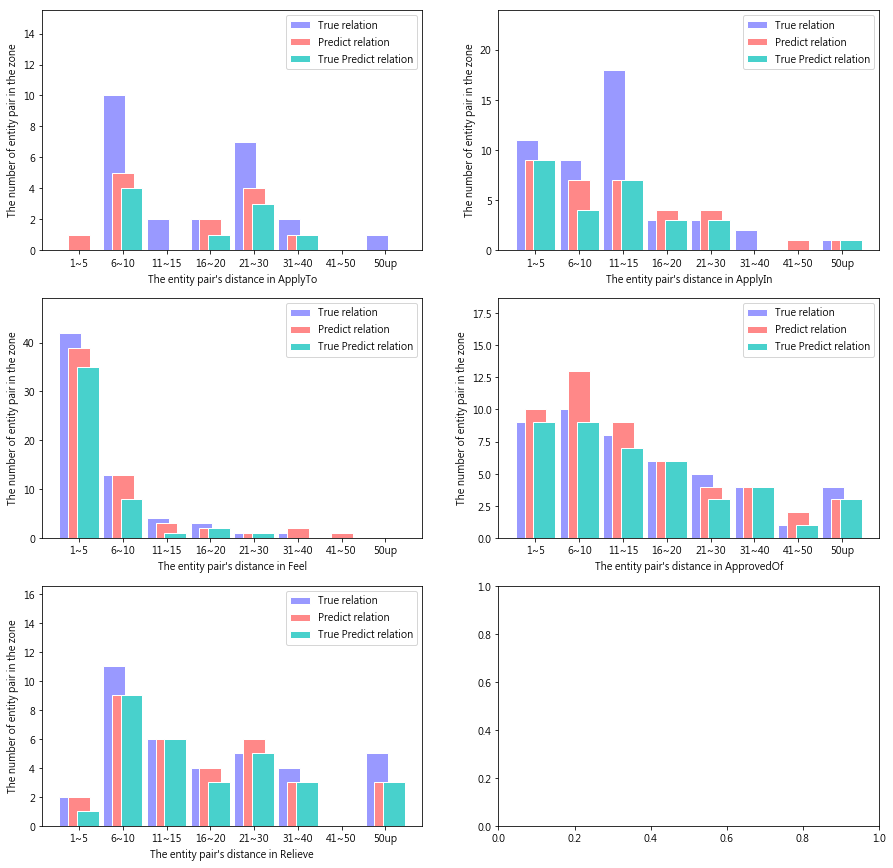

In [8]:
e_score, er_score, all_er_score = model.score(dev_loader, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.927 		 0.919 		 0.923 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.837 		 0.563 		 0.673 	
confusion matrix 
TP  	 fp  	 tn  	 fn
206 	 40 	 0 	 160 	

Relation error count: 20
Relation type 0
precision  	 recall  	 fbeta_score  	
0.690 		 0.500 		 0.580 	

Relation type 1
precision  	 recall  	 fbeta_score  	
0.767 		 0.550 		 0.641 	

Relation type 2
precision  	 recall  	 fbeta_score  	
0.868 		 0.736 		 0.797 	

Relation type 3
precision  	 recall  	 fbeta_score  	
0.970 		 0.604 		 0.744 	

Relation type 4
precision  	 recall  	 fbeta_score  	
0.829 		 0.330 		 0.472 	



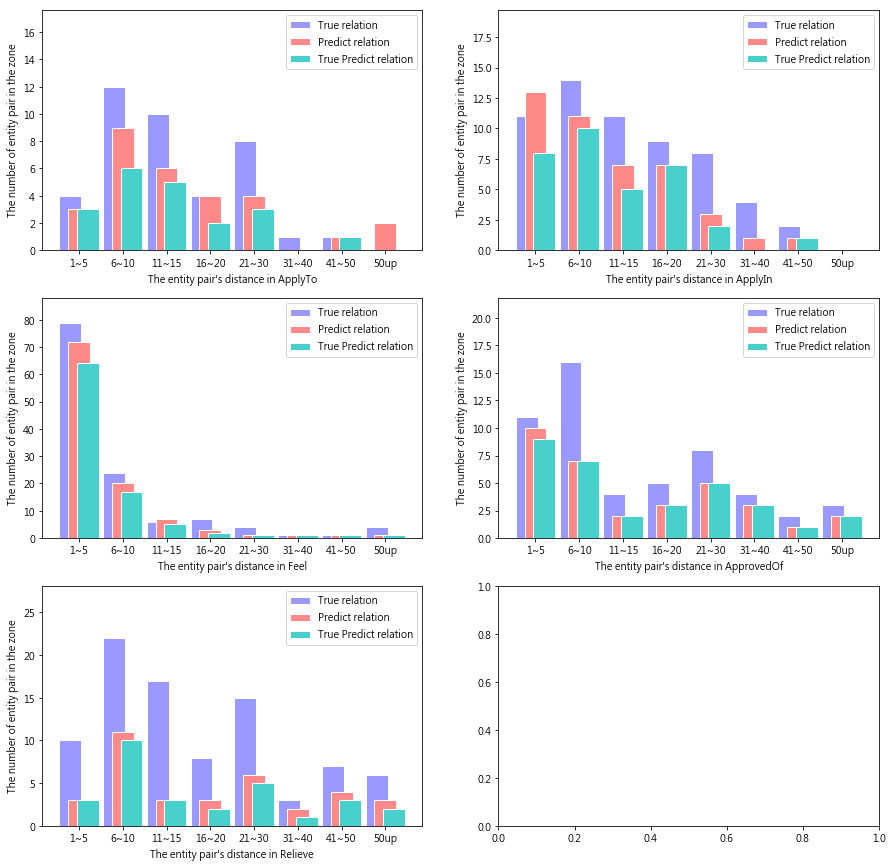

In [9]:
test_loader = BIOLoader(test_data, MAX_LEN, BATCH_SIZE, schema, rel_be_filtered=rel_be_filtered, 
                        word_to_ix=loader.word_to_ix, device=use_device)

e_score, er_score, all_er_score = model.score(test_loader, silent=True, rel_detail=True, analyze=True)

['因', '為', '有', '加', '保', '濕', '精', '華', '的', '成', '分', ',', '所', '以', '能', '維', '持', '比', '較', '長', '時', '間', '的', '不', '脫', '妝', ',', '我', '早', '上', '上', '完', '粉', '餅', '後', ',', '大', '概', '到', '下', '午', '3', '點', '左', '右', '最', '容', '易', '出', '油', ',', '但', '這', '款', '反', '而', '比', '較', '不', '容', '易', '出', '油', ',', '還', '有', '保', '溼', '的', '感', '覺', '真', '的', '很', '棒']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '',

['使', '用', '此', '款', '美', '髮', '油', '之', '後', ',', '頭', '髮', '觸', '感', '摸', '起', '來', '很', '保', '濕']
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC']
['', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', [], [], '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B']]

True
[(2, 3, 3), (12, 13, 4), (18, 19, 5)]
[((2, 3, 3), (18, 19, 5), 3)]
predict
[(2, 3, 3), (12, 13, 4), (18, 19, 5)]
[((2, 3, 3), (18, 19, 5), 3)]
['保', '濕', '商', '品', '一', '向', '是', '我', '最', '最', '注', '重', '的', '臉', '部', '保', '養', '商', '品', '之', '一', ',', '因', '為', '屬', '於', '極', '敏', '感', '性', '且', '偏', '乾', '的', '膚', '質', 

['本', '產', '品', '強', '調', '“', '高', '保', '濕', '“', ',', '接', '下', '來', '就', '來', '看', '看', '它', '的', '保', '濕', '到', '底', '有', '多', '好']
['B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O']
[[], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 2, 3), (20, 21, 5)]
[]
predict
[(0, 2, 3)]
[]
['一', '整', '天', '都', '沒', '有', '再', '補', '妝', ',', '晚', '上', '下', '班', '後', '還', '是', '沒', '什', '麼', '脫', '妝', ',', '這', '款', '粉', '底', '的', '控', '油', '效', '果', '真', '的', '很', '不', '錯']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

['這', '罐', '用', '起', '來', '保', '溼', '力', '感', '覺', '蠻', '好', '的', ',', '後', '續', '的', '妝', '很', '貼', ',', '也', '不', '會', '乾', '到', '脫', '皮']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 3), (5, 6, 5)]
[((0, 1, 3), (5, 6, 5), 3)]
predict
[(0, 1, 3), (5, 6, 5)]
[((0, 1, 3), (5, 6, 5), 3)]
['用', '了', '本', '產', '品', '臉', '上', '的', '保', '濕', 

['待', '在', '冷', '氣', '房', '的', 'O', 'L', '都', '知', '道', '即', '使', '夏', '天', '油', '水', '更', '不', '平', '衡', '所', '以', '臉', '部', '的', '乾', '感', '會', '更', '明', '顯', ',', '油', '感', '也', '會', '更', '凸', '顯', ',', '用', '了', '這', 'S', 'U', 'R', 'P', 'U', 'R', '後', '混', '和', '肌', '的', 'T', '字', '油', '感', '與', '雙', '頰', '乾', '感', '舒', '緩', '很', '多', ',', '滿', '威', '的']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['整', '體', '來', '說', ',', '這', '款', '卸', '妝', '水', '我', '滿', '喜', '歡', '的', ',', '卸', '妝', '效', '果', '不', '錯', ',', '沒', '有', '人', '工', '香', '精', ',', '邊', '卸', '妝', '還', '兼', '保', '濕', ',', '不', '過', ',', '控', '油', '方', '面', '對', '於', '我', '這', '個', '大', '油', '臉', '是', '沒', '什', '麼', '效', '果', '啦']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

['建', '議', '使', '用', '的', '用', '量', '是', '0', '.', '5', 'm', 'l', '約', '1', '元', '硬', '幣', '大', '小', ',', '大', '約', '是', '按', '壓', '2', '次', '的', '份', '量', ',', '這', '款', '保', '濕', '原', '液', '的', '質', '地', '是', '比', '較', '接', '近', '會', '流', '動', '的', '水', '溶', '液', '式', '透', '明', '凝', '露', '狀', ',', '原', '本', '預', '期', '高', '達', '1', '%', '的', '玻', '尿', '酸', '原', '液', '應', '該', '會', '更', '黏', '稠', '一', '些', ',', '但', '其', '實', '反', '而', '是', '比', '較', '清', '爽', '的', '質', '地']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC'

['因', '為', '臉', '部', '比', '較', '會', '出', '油', '的', '關', '係', ',', '所', '以', '對', '於', '稠', '稠', '黏', '黏', '的', '的', '化', '妝', '水', '都', '有', '點', '害', '怕', ',', '因', '為', '之', '前', '使', '用', '過', '類', '似', '質', '地', '的', '化', '妝', '水', ',', '使', '用', '後', '會', '像', '有', '一', '層', '膠', '水', '悶', '在', '臉', '上', '的', '感', '覺', ',', '但', '這', '瓶', '化', '妝', '水', ',', '真', '的', '讓', '我', '大', '大', '改', '觀']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

['不', '過', '對', '於', '難', '改', '善', '細', '紋', '問', '題', ',', '這', '個', '產', '品', '可', '以', '暫', '時', '性', '的', '解', '決', '問', '題', ',', '真', '的', '是', '不', '錯']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], ['Relieve-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(7, 8, 1), (12, 15, 

['它', '的', '質', '地', '滑', '順', '易', '推', ',', '很', '容', '易', '吸', '收', ',', '用', '量', '只', '需', '一', '點', '點', '就', '可', '以', '用', '滿', '全', '臉', ',', '夏', '天', '整', '天', '都', '在', '吹', '冷', '氣', ',', '本', '來', '我', '的', '皮', '膚', '超', '乾', '的', ',', '臉', '頰', '跟', '嘴', '角', '都', '有', '些', '脫', '皮', '了', '~', '但', '用', '了', '這', '款', '保', '濕', '就', '真', '的', '改', '善', '了', '耶', ',', '很', '好', '用']
['O', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', ['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['馬', '上', '跑', '出', '來', '.', '不', '然', '就', '是', '會', '發', '紅', '發', '癢', '.', '這', '款', '隔', '離', '霜', '質', '地', '真', '的', '很', '容', '易', '推', '勻', '而', '且', '保', '濕', '相', '當', '夠', '.', '因', '為', '擦', '了']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], '', ['Relieve-0-A', 'ApprovedOf-1-A'], ['Relieve-0-A', 'ApprovedOf-1-A'], '', '', '', [], [], '', '', '', '', '', '', '', '', '', ['ApprovedOf-1-B'], ['ApprovedOf-1-B'], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O

['我', '有', '時', '懶', ',', '就', '只', '有', '單', '擦', '青', '春', '露', ',', '在', '夏', '天', '來', '說', ',', '保', '濕', '度', '還', '可', '以', '∼']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '']

True
[(15, 16, 2), (20, 22, 5)]
[((15, 16, 2), (20, 22, 5), 1)]
predict
[(15, 16, 2), (20, 22, 5)]
[((15, 16, 2), (20, 22, 5), 1)]
['這', '款', 'a', 'm', 'p', 'm', '+', 's', 'k', 

['但', '是', '我', '是', '覺', '得', '這', '款', '的', '保', '濕', '效', '果', '還', '是', '比', '較', '明', '顯']
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '']

True
[(6, 7, 3), (9, 10, 5)]
[((6, 7, 3), (9, 10, 5), 3)]
predict
[(6, 7, 3), (9, 10, 5)]
[((6, 7, 3), (9, 10, 5), 3)]
['皮', '膚', '毛', '孔', '有', '細', '緻', '些', ',', '鼻', '頭', '粉', '刺', '用', '這', '瓶', '用', '來', '治', '蠻', '不', '錯', '的']
['O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O

['因', '此', ',', '好', '像', '擦', '上', '本', '產', '品', '的', '感', '覺', '會', '取', '決', '定', '之', '前', '基', '礎', '保', '養', '步', '驟', '的', '保', '養', '品', '的', '膚', '後', '感']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(7, 9, 3)]
[]
predict
[(7, 9, 3)]
[]
['整', '體', '來', '說', '我', '還', '滿', '喜', '歡', '這', '個', '產', '品', '的', ',', '真', '的', '不', '會', '刺', '激', '肌', '膚', ',', '又', '很', '保', '濕']
['O',

['這', '次', '收', '到', '的', '試', '用', '產', '品', '是', 'S', 'O', 'F', 'I', 'N', 'A', 'b', 'e', 'a', 'u', 't', 'e', '芯', '美', '顏', '美', '白', '瀅', '潤', '滲', '透', '乳', '升', '級', '版', ',', '清', '爽', '型', ',', '夏', '天', '到', '了', ',', '乳', '液', '也', '該', '換', '季', '囉', ',', '馬', '上', '來', '試', '用', '看', '看', 'S', 'O', 'F', 'I', 'N', 'A', 'b', 'e', 'a', 'u', 't', 'e', '芯', '美', '顏', '美', '白', '瀅', '潤', '滲', '透', '乳', '升', '級', '版', ',', '清', '爽', '型', '吧']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

['溫', '和', '不', '刺', '激', ' ', ' ', '敏', '感', '肌', '的', '我', '使', '用', '都', '沒', '問', '題', ' ', ' ', '只', '是', '不', '知', '道', '是', '我', '的', '底', '妝', '問', '題', ' ', '早', '上', '使', '用', '上', '妝', '會', '有', '削', '削', ' ', ' ', '保', '濕', '度', '不', '錯', ' ', '皮', '膚', '不', '會', '乾', '燥', ' ', ' ', '不', '油', '膩', '是', '和', '夏', '天', '使', '用']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
['', '', '', '', '', '', '', ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyTo-0-A', 'ApplyIn-1-A'], ['ApplyTo-0-A', 'ApplyIn-1

['這', '款', '美', '白', '精', '華', '液', ',', '一', '打', '開', '後', '沒', '有', '可', '怕', '的', '香', '精', '味', ',', '是', '舒', '服', '淡', '雅', '的', '香', '味', ',', '讓', '我', '聞', '起', '來', '不', '會', '覺', '得', '嫌', '惡', ',', '而', '且', '塗', '抹', '後', '很', '好', '吸', '收', ',', '沒', '有', '其', '他', '精', '華', '液', '會', '有', '的', '黏', '膩', '感', '覺', ',', '很', '清', '爽', '不', '黏', '膩', ',', '而', '且', '用', '量', '很', '省', ',', '一', '點', '點', '就', '可', '以', '塗', '滿', '全', '臉']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', 

['就', '是', '有', '點', '花', '草', '般', '清', '新', '的', '香', '味']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-0-A'], ['Feel-0-A']]

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'B-SENS', 'I-SENS']
['', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', ['Feel-0-A'], ['Feel-0-A']]

True
[(7, 8, 6), (10, 11, 4)]
[((7, 8, 6), (10, 11, 4), 2)]
predict
[(7, 8, 6), (10, 11, 4)]
[((7, 8, 6), (10, 11, 4), 2)]
['但', '我', '很', '喜', '歡', '這', '款', '的', '質', '地', ',', '清', '爽', '好', '推', '云', ',', '不', '會', '太', '黏', ',', '當', '然', '針', '對', '一', '般', '肌', '保', '濕', '度', '算', '還', '不', '錯', ',', '如', '果', '再', '乾', '泠', '一', '點', '就', '需', '要', '另', '外', '加', '強', '保', '濕', ',', '擦', '上', '後', '臉', '粉', '粉', '嫩', '嫩', '的', '.', '會', '是', '想', '回', '購', '的', '一', '款', '產', '品']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'B-SENS', 'I-SENS', 'O', 'B-PERC', 'I

['此', '款', '防', '曬', '乳', ',', '對', '於', '超', '容', '易', '過', '敏', '的', '我', '來', '說', ',', '完', '全', '不', '會', '過', '敏', '^', '^', '也', '不', '會', '敏', '感', '泛', '紅', ',', '而', '且', '不', '致', '痘']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '']

True
[(0, 1, 3), (31, 32, 1)]
[]
predict


['我', '在', '用', '此', '產', '品', '之', '前', '的', '皮', '膚', '狀', '況', ',', '是', '屬', '於', '比', '較', '容', '易', '長', '痘', '痘', '的', '狀', '態', ',']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
['', '', '', [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
['', '', '', '']

True
[(3, 5, 3), (22, 23, 1)]
[]
predict
[(22, 23, 1)]
[]
['而', '頭', '皮', '養', '護', '部', '份', '還', '蠻', '神', '奇', '的', ',', '因', '為', '我', '個', '人', '雖', '然', '沒', '有', '頭', '皮', '屑', '問', '題', ',', '但', '是', '有', '頭', '皮', '搔', '癢', '(', '不', '特', '地', '時', '間', '及', '部', '位', ')', '的', '問', '題', ',', '本', '來', '用', '這', '款', '因', '為', '個', '人', '對', '矽', '靈', '的', '害', '怕', ',', '

['如', '果', '是', '輕', '微', '黑', '眼', '圈', '的', '水', '水', '應', '該', '很', '適', '合', '這', '款', '~']
['O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O']
['', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '']

Predict output
['O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O']
['', '', '', '', '', ['Relieve-0-B'], ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '']

True
[(5, 7, 1), (16, 17, 3)]
[((5, 7, 1), (16, 17, 3), 4)]
predict
[(5, 7, 1), (16, 17, 3)]
[((5, 7, 1), (16, 17, 3), 4)]
['試', '用', '一', '週', '下', '來', ',', '容', '易', '長', '痘', '痘', '粉', '刺', '的', '我', '並', '沒', '有', '因', '為', '使', '用', '這', '瓶', 'B', 'B', '霜', '而', '冒', '痘']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'B-SYMP', '

['質', '地', '清', '爽', '不', '黏', '膩']
['B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', [], []]

Predict output
['B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'B-PERC', 'I-PERC']
[['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', [], []]

True
[(0, 1, 4), (2, 3, 6), (5, 6, 6)]
[((0, 1, 4), (2, 3, 6), 2)]
predict
[(0, 1, 4), (2, 3, 6), (5, 6, 6)]
[((0, 1, 4), (2, 3, 6), 2)]
Batch entity score
precision  	 recall  	 fbeta_score  	
(0.9425287356321839, 0.9111111111111111, 0.9265536723163842, None)

Batch relation score
precision  	 recall  	 fbeta_score  	
(0.75, 0.7058823529411765, 0.7272727272727272, None)

p_r_fscore
precision  	 recall  	 fbeta_score  	
(0.74999999953125, 0.7058823525259516, 0.7272727218365473) 12 4 0 5
['白', ',', '白', ',', '白', '.', '夏', '天', '就', '是', '要', '白', ',', '才', '會', '漂', '亮', '.', '今', '天', '很', '開', '心', '能', '試', '用', '到', '"', 'f', 'u', 'n', 'c', 'a', 'r', 'e', '船', '井',

['這', '款', '「', 'D', 'e', 'r', 'm', 'a', 'F', 'o', 'r', 'm', 'u', 'l', 'a', '美', '肌', '醫', '生', '植', '萃', '逆', '齡', '眼', '唇', '精', '露', '」', '不', '同', '於', '一', '般', '眼', '霜', ',', '它', '是', '主', '打', '眼', '唇', '兩', '處', '的', '保', '養', ',', '還', '滿', '特', '別', '的']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['這', '款', '不', '會', '因', '為', '是', '乳', '霜', '導', '致', '臉', '部', '過', '油', ',', '而', '產', '生', '粉', '刺', ',', '在', '使', '用', '的', '其', '間', '也', '不', '會', '冒', '痘', '痘']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', [], []]

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', [], []]

True
[(0, 1, 3), (19, 20, 1), (32, 33, 1)]
[]
predict
[(0, 1, 3), (19, 20, 1), (32, 33, 1)]
[]
['其', '實', '收', '到', '此', '產', '品', '有', 

['在', '炎', '熱', '的', '夏', '天', '這', '款', '水', '清', '新', '3', '合', '1', '毛', '孔', '緊', '緻', '保', '濕', '精', '華', '露', '超', '適', '合', '需', '要', '高', '度', '保', '濕', '又', '需', '要', '油', '水', '平', '衡', '的', '效', '果', '的', '人', '來', '天', '天', '使', '用']
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-PROD', 'I-PROD', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], [], [], '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-PROD', 'I-PROD', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O'

['讓', '我', '的', '肌', '膚', '長', '疹', '子', '或', '痘', '痘', ',', '會', '刺', '激', '性', '的', '卸', '妝', '產', '品', '尤', '其', '影', '響', '最', '大', ',', '此', '款', '產', '品', '很']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O']
['', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O']
['', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '']

True
[(9, 10, 1), (28, 31, 3)]
[]
predict
[(9, 10, 1), (28, 31, 3)]
[]
['在', '冬', '天', ',', '保', '濕', '度', '也', '還', '不', '錯', ',', '肌', '膚', '也', '感', '覺', '有

['夏', '季', '時', '兩', '頰', '略', '乾', 'T', '字', '極', '油', ',', '不', '認', '真', '做', '好', '保', '濕', '的', '話', '常', '常', '晚', '上', '妝', '都', '浮', '到', '細', '毛', '上', '了']
['B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(0, 1, 2)]
[]
predict
[(0, 1, 2)]
[]
['保', '濕', '度', '普', '通', ',', '對', '於', '個', '人', '的', '乾', '性', '皮', '膚', '並', '沒', '有', '感', '覺', '較', '保', '濕']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O',

['我', '覺', '得', '它', '很', '好', '用', ',', '而', '且', '價', '格', '不', '貴', ',', '夏', '天', '要', '來', '了', ',', '擦', '在', '身', '上', '可', '美', '白', '又', '保', '濕', ',', '是', '一', '個', '很', '好', '的', '產', '品']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-1-B', 'ApplyIn-0-B'], ['ApplyIn-1-B', 'ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', ['ApplyIn-1-A'], ['ApplyIn-1-A'], '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '',

['我', '現', '在', '最', '喜', '歡', '用', '這', '瓶', '搭', '配', '導', '出', '儀', '當', '做', '平', '日', '的', '清', '潔', '保', '養']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(7, 8, 3)]
[]
predict
[(7, 8, 3)]
[]
['這', '款', '精', '華', '是', '比', '較', '像', '乳', '液', '的', '質', '地', ',', '白', '色', '乳', '狀', '擦', '起', '來', '很', '容', '易', '吸', '收', ',', '多', '加', '按', '摩', '一', '次', '幾', '乎', '都', '滲', '透', '進', '去', ',', '吸', '收', '度', '很', '好', ',', '有', '滋', '潤', '感', '卻', '不', '會', '有', '黏', '膩', '感', '哦', ',', '不', '黏', '不', '膩', '很', '舒', '服']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O',

['C', 'L', 'A', 'R', 'I', 'N', 'S', '克', '蘭', '詩', '煥', '顏', '緊', '緻', '彈', '力', '精', '華', '露', '很', '適', '合', '在', '熱', '死', '人', '的', '夏', '天', '使', '用', ',', '質', '地', '清', '爽', '不', '負', '擔', '又', '蠻', '保', '濕', '的', '是', '很', '值', '得', '推', '薦', '的', '產', '品']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-1-B'], ['ApplyIn-1-B'], '', '', '', ['Feel-0-A'], ['Feel-0-A'], ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', ['ApplyIn-1-A'], ['ApplyIn-1-A'], '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

['這', '款', '真', '的', '非', '常', '適', '合', '夏', '天', '出', '油', '的', '水', '水', ',', '即', '控', '油', '又', '保', '濕', ',', '到', '了', '下', '午', '也', '大', '約', '鼻', '翼', '二', '邊', '比', '較']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A', 'ApprovedOf-2-A', 'ApprovedOf-1-A'], ['Relieve-0-A', 'ApprovedOf-2-A', 'ApprovedOf-1-A'], '', '', '', '', '', '', [], [], ['Relieve-0-B'], ['Relieve-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[['Relieve-0-A', 'ApprovedOf-2-A', 'ApprovedOf-1-A'], ['Relieve-0-A', 'A

['這', '款', '保', '溼', '凝', '露', '非', '常', '特', '別']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '']

True
[(0, 1, 3)]
[]
predict
[(0, 1, 3)]
[]
['我', '覺', '得', '這', '瓶', '保', '溼', '噴', '霧', '是', '夏', '天', '出', '遊', '或', '辦', '公', '室', '必', '備', '的', '好', '東', '西', ',', '推', '薦', '給', '大', '家']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', [], [], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

['只', '是', '覺', '得', '在', '冬', '天', ',', '對', '於', '熟', '齡', '肌', '膚', ',', '光', '擦', '這', '乳', '液', '還', '是', '不', '夠', '滋', '潤', ',', '之', '後', '還', '是', '要', '再', '上', '乳', '霜', '才', '夠', '滋', '潤', ',', '覺', '得', '這', '應', '該', '是', '在', '夏', '天', '可', '以', '單', '擦', '的', ',', '可', '以', '長', '時', '間', '維', '持', '保', '濕', '度', '的', '乳', '液']
['O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O']
['', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '', '', '', '', '', '', '', '', '', '', ''

['至', '於', '大', '家', '關', '注', '的', '美', '白', '效', '果', ',', '我', '覺', '得', '這', '瓶', '有', '助', '於', '改', '善', '暗', '沉', '膚', '色', ',', '讓', '肌', '膚', '比', '較', '透', '亮']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', ['ApprovedOf-0-A'], ['ApprovedOf-0-A'], '', '', '', '', '', '', ['ApprovedOf-0-B'], ['ApprovedOf-0-B'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

True
[(7, 8, 5), (15, 16, 3)

['但', '是', '它', '的', '缺', '點', '是', ':', '顏', '色', '擦', '了', '不', '自', '然', ',', '太', '白', '了', ',', '遮', '瑕', '力', '不', '夠', '好', ',', '像', '我', '使', '用', '的', '這', '幾', '天', '長', '了', '痘', '痘', ',', '如', '果', '光', '用', '這', '瓶', '遮', '的', '話', '就', '會', '不', '夠', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', [], [], '', '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP',

['我', '不', '建', '議', '用', '這', '款', '修', '飾', '細', '紋']
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', [], [], '', '', [], []]

Predict output
['O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'B-SYMP', 'I-SYMP']
['', '', '', '', '', ['Relieve-0-A'], ['Relieve-0-A'], '', '', ['Relieve-0-B'], []]

True
[(5, 6, 3), (9, 10, 1)]
[]
predict
[(5, 6, 3), (9, 10, 1)]
[]
['保', '濕', '度', '非', '常', '夠', ',', '很', '適', '合', '冬', '天', '使', '用']
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '']

Predict output
['B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SEAS', 'I-SEAS', 'O', 'O']
[['ApplyIn-0-A'], ['ApplyIn-0-A'], ['ApplyIn-0-A'], '', '', '', '', '', '', '', ['ApplyIn-0-B'], ['ApplyIn-0-B'], '', '']

True
[(0, 2, 5), (10, 11, 2)]
[((0, 2, 5), (10, 11, 2),

['香', '味', '清', '淡', ',', '使', '用', '起', '來', '很', '水', '潤', ',', '又', '不', '黏', '膩', ',', '比', '一', '般', '保', '濕', '化', '妝', '水', '保', '濕', ',', '卻', '又', '不', '會', '使', '皮', '膚', '出', '油', ',', '很', '好', '用']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], '', '', '', '']

Predict output
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', ['Feel-0-B'

['這', '款', '保', '濕', '精', '華', '乳', '液', '非', '常', '推', '薦', '給', '很', '會', '出', '油', '的', '水', '水']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '', '']

True
[(0, 1, 3), (15, 16, 1)]
[]
predict
[(0, 1, 3), (15, 16, 1)]
[]
['這', '瓶', '倒', '是', '不', '錯', '~', '臉', '上', '的', '出', '油', '還', '好', '(', '但', '還', '是', '要', '吸', '油', '一', '下', ')']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', [], [], '', '', '', '', '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O'

['氣', '味', '方', '面', ',', '這', '款', '時', '光', '無', '痕', '緊', '緻', '精', '粹', '剛', '擠', '出', '來', '猛', '然', '一', '聞', '我', '以', '為', '是', '甜', '美', '的', '果', '香', ',', '不', '過', '細', '聞', '發', '現', '有', '點', '像', '麝', '香', '之', '類', '比', '較', '強', '的', '氣', '味', ',', '雖', '然', '不', '是', '我', '個', '人', '特', '別', '偏', '好', '的', '味', '道', ',', '不', '過', '並', '不', '是', '嗆', '人', '的', '濃', '香', ',', '在', '塗', '抹', '時', '味', '道', '不', '會', '太', '濃', ',', '所', '以', '還', 'O', 'K', '啦']
['B-SENS', 'I-SENS', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O'

['這', '款', '產', '品', ',', '試', '用', '下', '來', ',', '感', '受', '到', '保', '溼', '度', '很', '不', '錯', ',', '臉', '部', '肌', '膚', '變', '得', '非', '常', '的', '柔', '嫩', '光', '滑', ',', '而', '且', '變', '亮', '了', ',', '試', '用', '期', '間', '也', '沒', '有', '不', '適', '的', '狀', '況', '產', '生', ',', '整', '天', '下', '來', ',', '肌', '膚', '還', '是', '處', '於', '很', '滋', '潤', '的', '狀', '態', '(', '並', '不', '是', '出', '油', ')', '哩', '∼', '∼']
['B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O']
[['ApprovedOf-0-A', 'ApprovedOf-1-A'], ['ApprovedOf-0-A', 'ApprovedOf-1-A'], ['ApprovedOf-0-A', 'ApprovedOf-1-A'], ['ApprovedOf-

['混', '合', '性', '膚', '質', '的', '我', '洗', '完', '很', '保', '濕', '清', '爽', '不', '油', '膩']
['B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
[['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], ['ApplyTo-0-B'], '', '', '', '', '', ['ApplyTo-0-A'], ['ApplyTo-0-A'], [], [], '', '', '']

Predict output
['B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'B-FUNC', 'I-FUNC', 'B-PERC', 'I-PERC', 'O', 'O', 'O']
[[], [], [], [], [], '', '', '', '', '', [], [], [], [], '', '', '']

True
[(0, 4, 0), (10, 11, 5), (12, 13, 6)]
[((0, 4, 0), (10, 11, 5), 0)]
predict
[(0, 4, 0), (10, 11, 5), (12, 13, 6)]
[]
['不', '會', '像', '有', '些', '精', '華', '液', '保', '濕', '度', '不', '夠', ',', '用', '了', '還', '會', '脫', '皮', '長', '屑', '屑', ',']
['O', 'O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'B-FUNC', 'I-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['

['雖', '然', '稱', '是', '化', '妝', '水', ',', '但', '是', '質', '地', '是', '有', '點', '水', '乳', '狀', ',', '是', '完', '全', '透', '明', '狀']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '']

Predict output
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', '', '', '']

True
[(10, 11, 4), (16, 17, 6)]
[((10, 11, 4), (16, 17, 6), 2)]
predict
[(10, 11, 4), (16, 17, 6)]
[((10, 11, 4), (16, 17, 6), 2)]
['試', '用', '在', '手', '上', ',', '明', '顯', '感', '受', '到', '水', '感', '提', '升', ',', '肌', '膚', '也', '有', '一', '層', '水', '潤', '的', '光', '澤', ',', '偏', '水', '

['使', '用', '這', '款', '卸', '妝', '乳', '時', '沒', '有', '刺', '激', '感', ',', '蠻', '溫', '和', '的', ',', '試', '用', '期', '間', '也', '沒', '出', '現', '過', '敏', '現', '象', '或', '長', '痘', '痘', '情', '形']
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O']
['', '', [], [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '']

Predict output
['O', 'O', 'B-PROD', 'I-PROD', 'I-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O']
['', '', [], [], [], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], '', '']

True
[(2, 6, 3), (33, 34, 1)]
[]
predict
[(2, 5, 3), (33, 34, 

['本', '來', '我', '的', '臉', '是', '偏', '油', '的', ',', '擦', '了', '這', '瓶', '後', '比', '較', '不', '會', '出', '油', '了', ',', '可', '能', '是', '以', '前', '皮', '膚', '水', '份', '不', '夠', '所', '以', '皮', '膚', '就', '一', '直', '想', '用', '出', '油', '來', '保', '溼', '度', '不', '錯', ';', '現', '在', '皮', '膚', '覺', '得', '水', '份', '夠', '了', '所', '以', '就', '比', '較', '不', '出', '油', '了', '~', '整', '體', '來', '說', '是', '還', '不', '錯', '的', '商', '品', '喔', '^', '^']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'B-FUNC', 'I-FUNC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SYMP', 'I-SYMP', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['', '', '', '', '', '', '', '', '', '', '', '', ['Relieve-0-A', 'Relieve-1-A', 'Approve

['嫩', '肌', '精', '的', '質', '地', '是', '介', '於', '化', '妝', '水', '跟', '精', '華', '液', '之', '間', ',', '有', '點', '濃', '稠', '又', '不', '會', '太', '濃', '稠']
['O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC']
['', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', [], []]

Predict output
['O', 'O', 'O', 'O', 'B-SENS', 'I-SENS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC', 'O', 'O', 'O', 'O', 'B-PERC', 'I-PERC']
['', '', '', '', ['Feel-0-A'], ['Feel-0-A'], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ['Feel-0-B'], ['Feel-0-B'], '', '', '', '', [], []]

True
[(4, 5, 4), (21, 22, 6), (27, 28, 6)]
[((4, 5, 4), (21, 22, 6), 2)]
predict
[(4, 5, 4), (21, 22, 6), (27, 28, 6)]
[((4, 5, 4), (21, 22, 6), 2)]
['眼', '霜', '的', '質', '

['這', '瓶', '凝', '露', '具', '有', '6', '2', '種', '高', '效', '保', '濕', '美', '肌', '成', '分', ',', '是', 'M', 'e', 'd', 'i', 'p', 'l', 'u', 's', '社', '長', '自', '行', '開', '發', '過', '敏', '性', '肌', '膚', '也', '能', '使', '用', '的', '保', '養', '品']
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', [], [], [], [], [], '', '', '', '', '', '', '', '']

Predict output
['B-PROD', 'I-PROD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'I-STAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
[[], [], '', '', '', '', '', '', '',

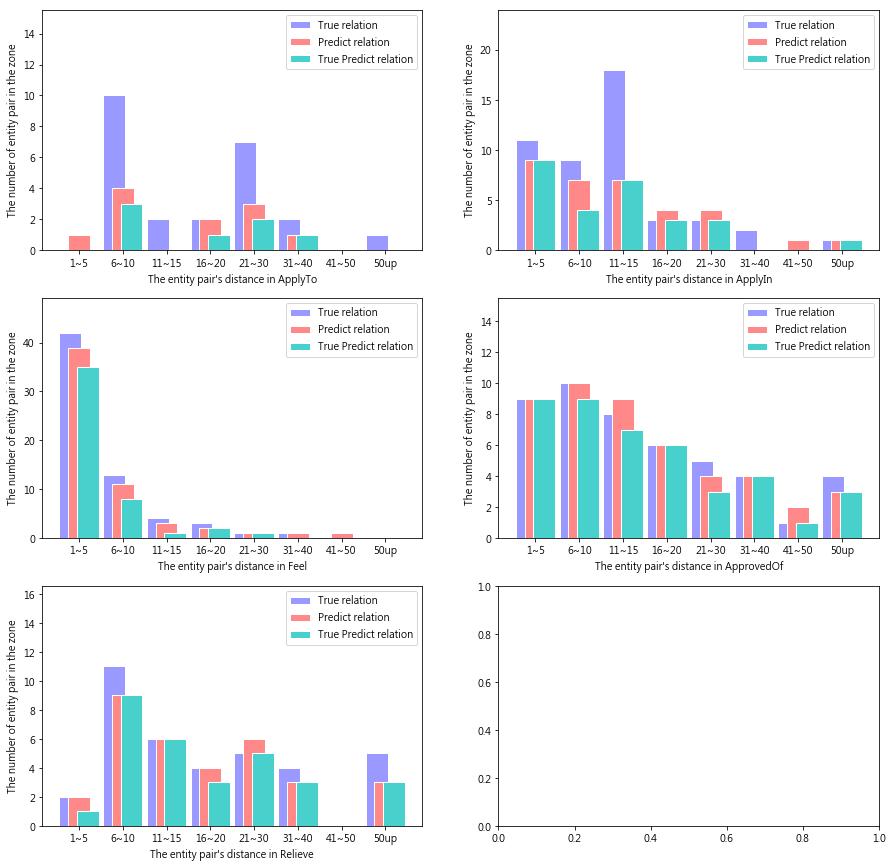

In [10]:
e_score, er_score, all_er_score = model.score(dev_loader, isTrueEnt=True, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.929 		 0.919 		 0.924 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.866 		 0.563 		 0.682 	
confusion matrix 
TP  	 fp  	 tn  	 fn
206 	 32 	 0 	 160 	

Relation error count: 25
Relation type 0
precision  	 recall  	 fbeta_score  	
0.760 		 0.475 		 0.585 	

Relation type 1
precision  	 recall  	 fbeta_score  	
0.786 		 0.550 		 0.647 	

Relation type 2
precision  	 recall  	 fbeta_score  	
0.868 		 0.736 		 0.797 	

Relation type 3
precision  	 recall  	 fbeta_score  	
0.971 		 0.623 		 0.759 	

Relation type 4
precision  	 recall  	 fbeta_score  	
0.935 		 0.330 		 0.487 	



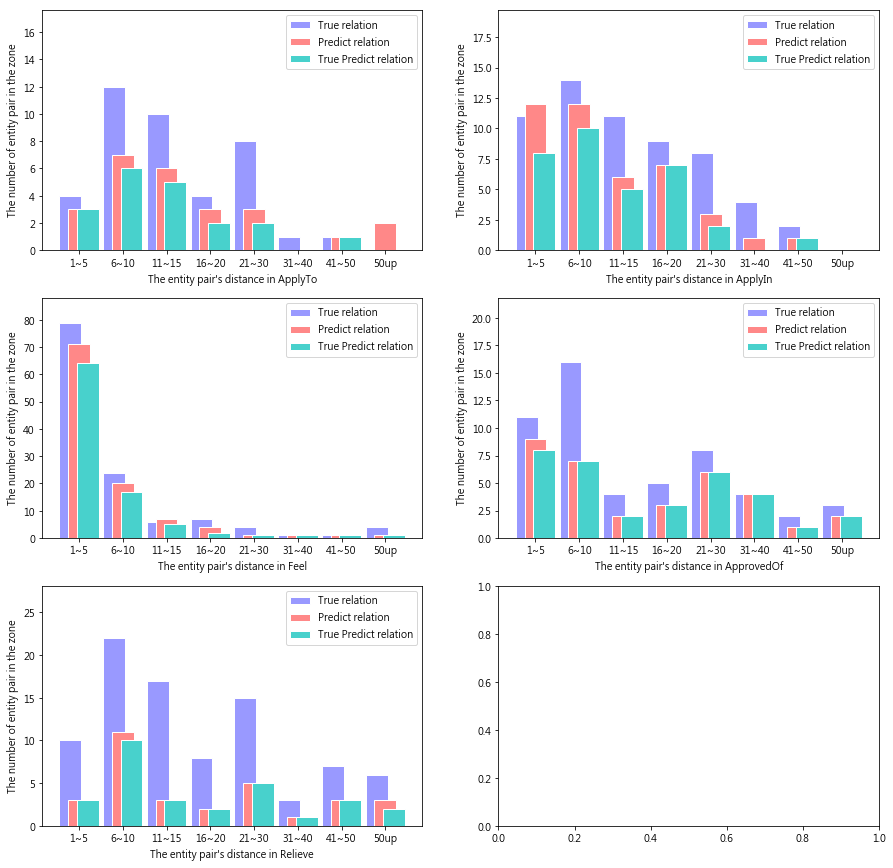

In [11]:
e_score, er_score, all_er_score = model.score(test_loader, isTrueEnt=True, silent=True, rel_detail=True, analyze=True)


Entity detection score
precision  	 recall  	 fbeta_score
0.964 		 0.957 		 0.961 	
Entity+Relation detection score 
precision  	 recall  	 fbeta_score  	
0.941 		 0.843 		 0.89 	
confusion matrix 
TP  	 fp  	 tn  	 fn
1067 	 67 	 0 	 198 	

Relation error count: 54
Relation type 0
precision  	 recall  	 fbeta_score  	
0.927 		 0.809 		 0.864 	

Relation type 1
precision  	 recall  	 fbeta_score  	
0.930 		 0.770 		 0.843 	

Relation type 2
precision  	 recall  	 fbeta_score  	
0.957 		 0.895 		 0.925 	

Relation type 3
precision  	 recall  	 fbeta_score  	
0.946 		 0.842 		 0.891 	

Relation type 4
precision  	 recall  	 fbeta_score  	
0.920 		 0.835 		 0.875 	



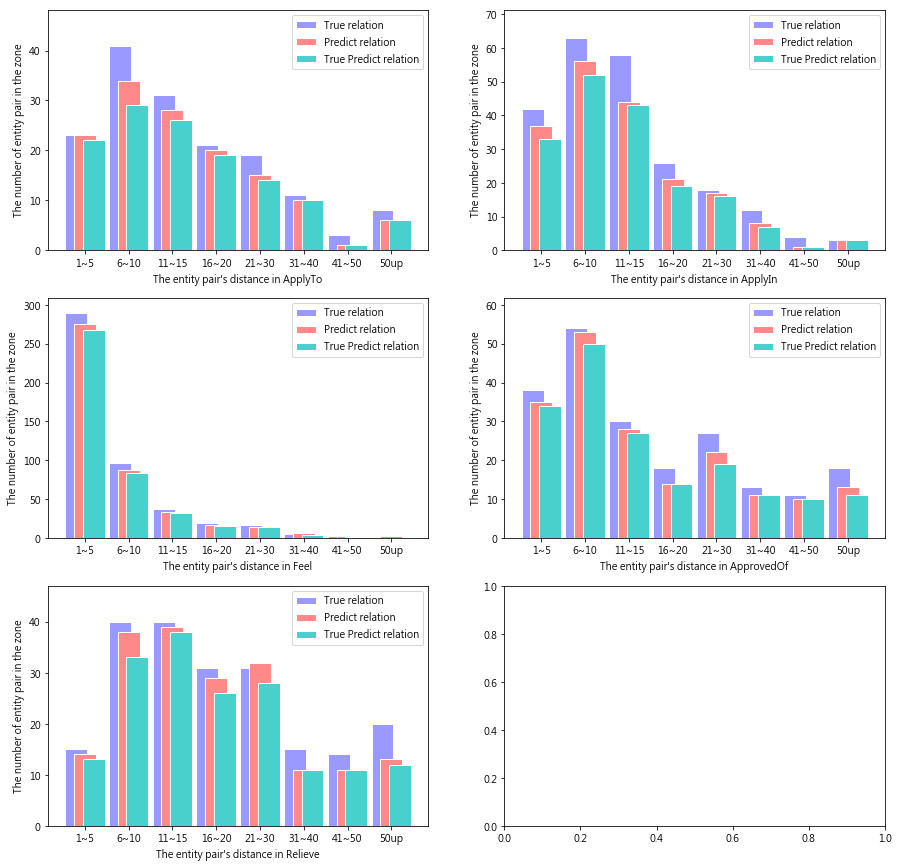

In [12]:
e_score, er_score, all_er_score = model.score(loader, silent=True, rel_detail=True, analyze=True)